In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import os
import matplotlib.pyplot as plt

In [8]:
train_path = 'training/'
test_path = 'testing/'

In [50]:
train_data = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
                                validation_split = 0.2,
                                rotation_range = 0.2,
                                zoom_range = 0.2
                               )\
.flow_from_directory(directory = train_path,
                     target_size = (190,190),
                     classes = ['invalid', 'valid'],
                     batch_size = 10,
                     #color_mode ='grayscale'
                    )

Found 170 images belonging to 2 classes.


In [98]:
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory = test_path,
                     target_size = (190,190),
                     classes = ['invalid', 'valid'],
                     batch_size=10,
                     #color_mode= 'grayscale',
                     shuffle = False
                    )

Found 71 images belonging to 2 classes.


In [52]:
def plotImages(images_arr):
    fig,axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [53]:
imgs,labels= next(train_data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

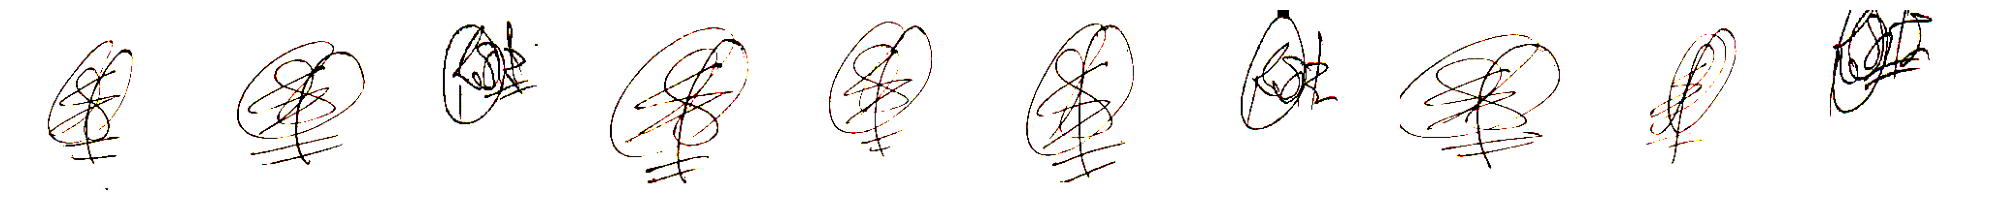

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [54]:
plotImages(imgs)
print(labels)

In [56]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(190,190,3)),
    
    MaxPool2D(pool_size=(2,2), strides = 2),
    
    Conv2D(filters= 64 , kernel_size=(3,3), activation='relu', padding='same'),
    
    MaxPool2D(pool_size=(2,2), strides = 2),
    
    Flatten(),
    
    Dense(units = 2, activation = 'softmax'),
])

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 190, 190, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 95, 95, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 95, 95, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 141376)            0         
                                                                 
 dense_1 (Dense)             (None, 2)                

In [58]:
model.compile(optimizer = Adam(learning_rate = 0.0001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
             )

In [63]:
model.fit(x = train_data,
          #$validation_data = validation_data,
          epochs = 15,
          verbose = 2
         )

Epoch 1/15
17/17 - 1s - loss: 0.0453 - accuracy: 1.0000 - 1s/epoch - 84ms/step
Epoch 2/15
17/17 - 1s - loss: 0.2146 - accuracy: 0.9706 - 1s/epoch - 77ms/step
Epoch 3/15
17/17 - 1s - loss: 0.1719 - accuracy: 0.9941 - 1s/epoch - 78ms/step
Epoch 4/15
17/17 - 1s - loss: 0.0790 - accuracy: 0.9941 - 1s/epoch - 79ms/step
Epoch 5/15
17/17 - 1s - loss: 0.0792 - accuracy: 1.0000 - 1s/epoch - 78ms/step
Epoch 6/15
17/17 - 1s - loss: 0.0642 - accuracy: 1.0000 - 1s/epoch - 80ms/step
Epoch 7/15
17/17 - 1s - loss: 0.0495 - accuracy: 0.9941 - 1s/epoch - 79ms/step
Epoch 8/15
17/17 - 1s - loss: 0.0983 - accuracy: 0.9882 - 1s/epoch - 81ms/step
Epoch 9/15
17/17 - 1s - loss: 0.0225 - accuracy: 1.0000 - 1s/epoch - 81ms/step
Epoch 10/15
17/17 - 1s - loss: 0.0055 - accuracy: 1.0000 - 1s/epoch - 80ms/step
Epoch 11/15
17/17 - 1s - loss: 0.0210 - accuracy: 0.9941 - 1s/epoch - 76ms/step
Epoch 12/15
17/17 - 1s - loss: 0.0234 - accuracy: 1.0000 - 1s/epoch - 80ms/step
Epoch 13/15
17/17 - 1s - loss: 0.1258 - accuracy:

In [ ]:
#test in batches of 10 
# to test singly 3d image has to be converted into 4d 
# extra paramater is size of batch (1 for single)
#tensorflow expects batches of data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

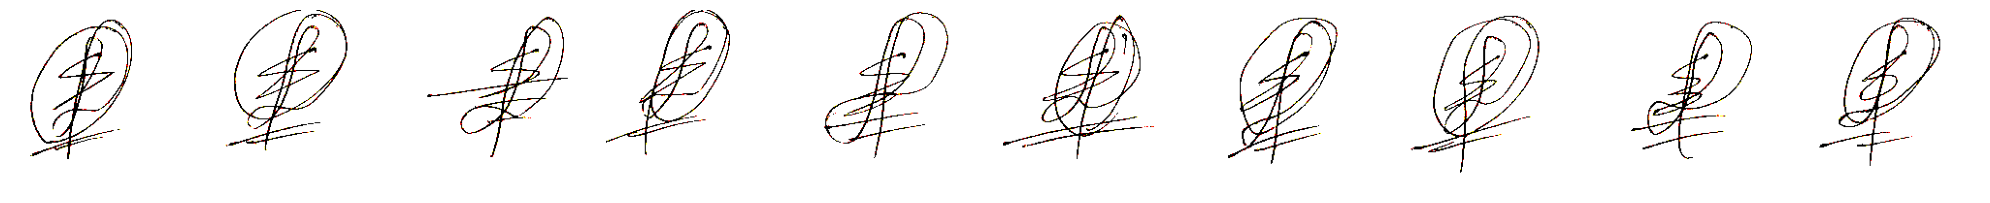

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [99]:
test_imgs , test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [100]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [101]:
predictions = model.predict(x= test_batches)

8/8 [==============================] - 0s 63ms/step


In [103]:
predictions

array([[1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 2.3904462e-13],
       [1.0000000e+00, 5.7978299e-24],
       [9.9967277e-01, 3.2722129e-04],
       [1.0000000e+00, 1.4379401e-32],
       [7.4210995e-01, 2.5789008e-01],
       [1.0000000e+00, 2.0323115e-25],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.4029934e-37],
       [9.9974769e-01, 2.5235655e-04],
       [1.5539071e-16, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.5069199e-03, 9.9849308e-01],
       [1.2741583e-13, 1.0000000e+00],
       [4.7010045e-02, 9.5298994e-01],
       [2.0125378e-33, 1.0000000e+00],
       [1.0000000e+00, 5.8726795e-12],
       [1.5729817e-14, 1.0000000e+00],
       [1.4771136e-32, 1.0000000e+00],
       [9.9999785e-01, 2.2052748e-06],
       [1.0000000e+00, 4.9562381e-30],
       [1.0000000e+00, 3.0792465e-27],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 2.

In [104]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [78]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [105]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis = -1))

In [106]:
test_batches.class_indices

{'invalid': 0, 'valid': 1}

In [96]:
import itertools

Confusion matrix, without normalization
[[39 14]
 [ 0 18]]


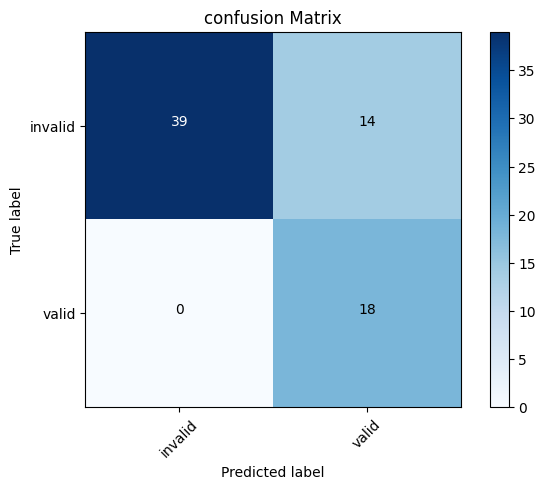

In [107]:
cm_plot_labels= ['invalid', 'valid']
plot_confusion_matrix(cm = cm, classes = cm_plot_labels, title = 'confusion Matrix')

In [88]:
if os.path.isdir('models') is False:
    os.makedirs('models')
model.save('models/first_model_too_good.h5')